<a href="https://colab.research.google.com/github/KSwaviman/Conjoint-Analysis/blob/main/Analytics_on_Vino_Survey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing necessary packages:



mlogit,  
dfidx,
ggpubr

In [ ]:
install.packages('mlogit')
install.packages('dfidx')
# install.packages("ggpubr")
set.seed(123) # to make the generated random numbers reproducible.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Exploratory Analysis and Data Pre-processing

In [ ]:
# Setting random number generator to use pre R 3.6 method

if (getRversion() >= "3.6.0") suppressWarnings(RNGversion("3.5.0"))

Setting up attributes to be used in Share Simulator

In [ ]:
# Setting up attributes to be used in Share Simulator
attrib <- list(Price  = c("Value(3€-10€)", "Popular(10€-15€)", "Premium(15€-30€)", "Luxury(50€-100€)"),
               Brand = c("Cantina Toblino", "Cavit", "Ferrari","Mezzacorona"),
               Type.of.Wine = c("Red wine", "Rose wine", "Sparkling wine", "White wine"),
               Percentage.of.Alcohol = c("5.5 %", "7 %", "12 %", "18 %"),
               Aging.time.of.Wine = c("1 year", "2 years", "3 years", "4 years", "5 years"))

Load the dataset hosted on Git using read.csv. Run a summary.

In [ ]:
# Load the data from hosted repo for reproducability of code

df1 <- read.csv("https://raw.githubusercontent.com/KSwaviman/Conjoint-Analysis/main/conjoint_survey_resp_v1.csv",
                   colClasses = c(Price = "factor", Brand = "factor",Type.of.Wine = "factor",Percentage.of.Alcohol = "factor",
                                  Aging.time.of.Wine = "factor",
                                  choice="integer"))
# Summary of data
summary(df1)

Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“not all columns named in 'colClasses' exist”


       X            resp.id          ques       alt           
 Min.   :  0.0   Min.   : 1.0   Min.   :1   Length:840        
 1st Qu.:209.8   1st Qu.: 8.0   1st Qu.:2   Class :character  
 Median :419.5   Median :15.5   Median :4   Mode  :character  
 Mean   :419.5   Mean   :15.5   Mean   :4                     
 3rd Qu.:629.2   3rd Qu.:23.0   3rd Qu.:6                     
 Max.   :839.0   Max.   :30.0   Max.   :7                     
              Price                 Brand             Type.of.Wine
 Luxury(50€-100€):198   Cantina Toblino:231   Red wine      :199  
 Popular(10€-15€):247   Cavit          :203   Rose wine     :194  
 Premium(15€-30€):200   Ferrari        :213   Sparkling wine:234  
 Value(3€-10€)   :195   Mezzacorona    :193   White wine    :213  
                                                                  
                                                                  
 Percentage.of.Alcohol Aging.time.of.Wine      Age            Sex           
 12 % :218   

From the summary we observe, the features of interest are of desired data types.    
Choice column is in integer and Predictors in Factor.

In [ ]:
# We select only the predictor columns and store in a new dataframe.
# Excluding the demographic info from collected survey data.

df = df1[,c(2,3,4,5,6,7,8,9,17)]

In [ ]:
# To check the head of data

head(df)

,resp.id,ques,alt,Price,Brand,Type.of.Wine,Percentage.of.Alcohol,Aging.time.of.Wine,Choice
,<int>,<int>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>
1,1,1,Option 1,Value(3€-10€),Cavit,White wine,5.5 %,3 years,0
2,1,1,Option 2,Popular(10€-15€),Mezzacorona,White wine,18 %,1 year,1
3,1,1,Option 3,Premium(15€-30€),Ferrari,Rose wine,12 %,1 year,0
4,1,1,Option 4,Popular(10€-15€),Ferrari,Rose wine,18 %,4 years,0
5,1,2,Option 1,Premium(15€-30€),Mezzacorona,Sparkling wine,7 %,4 years,1
6,1,2,Option 2,Value(3€-10€),Cantina Toblino,Rose wine,12 %,5 years,0


Cross Tab to check the count per category. 

In [ ]:
xtabs(Choice ~ Brand, data=df)

Brand
Cantina Toblino           Cavit         Ferrari     Mezzacorona 
             42              47              66              55 

Xtab also helps us understand if we have any imbalance as well as missing values.

In [ ]:
xtabs(Choice ~ Price, data=df)

Price
Luxury(50€-100€) Popular(10€-15€) Premium(15€-30€)    Value(3€-10€) 
              20               81               47               62 

The data appears fine.

### Univariate Analysis:

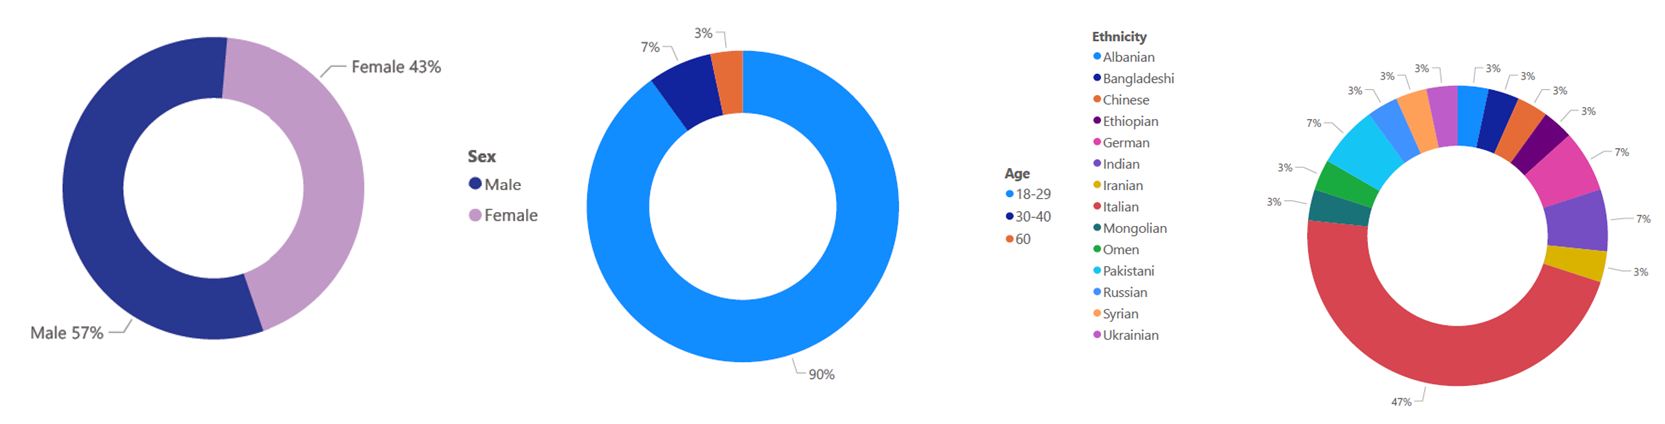

### Bi-variate Analysis:

Link [here](https://app.powerbi.com/groups/me/reports/80d8d218-fb93-42ce-897d-0ed9b80e7d53/ReportSection).

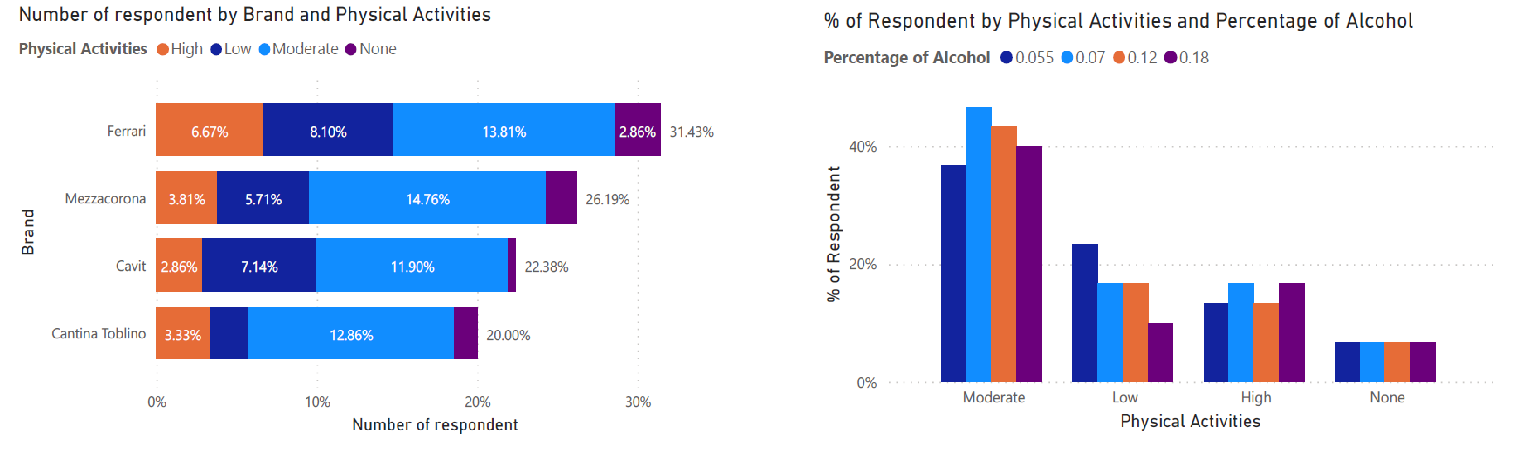

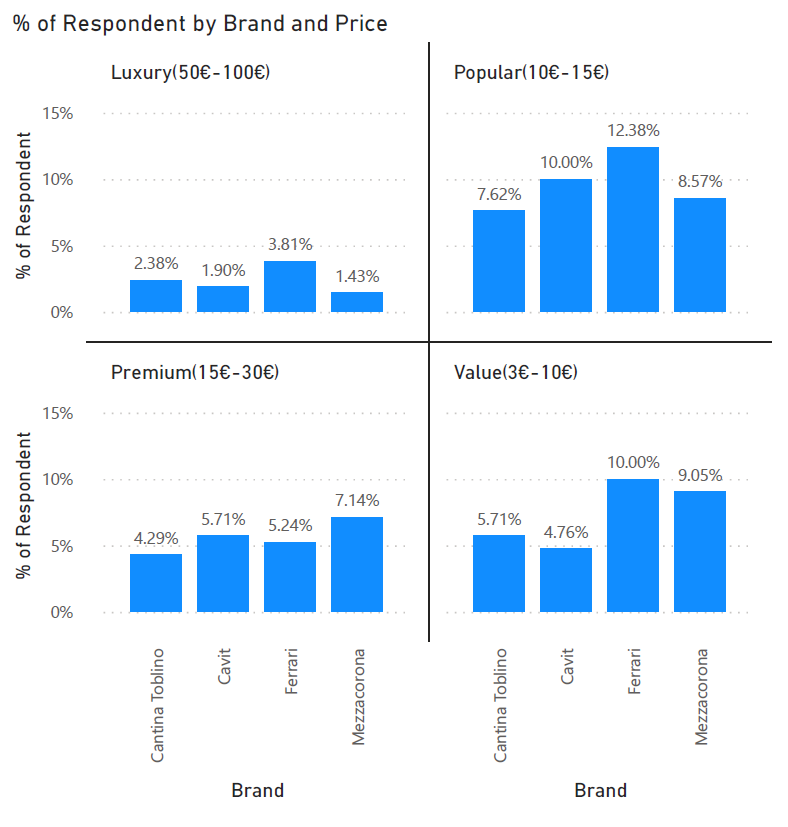

# Fitting a choice model with Conditional Logistic Regression:

## Transforming data:  

Before feeding the dataframe to mlog we need to perform certain transformation to the data.

In [ ]:
library(mlogit)

# Transforming the dataframe to fit into mlogit() later:

# building a new column chid as the existing indexes aren't unique. 
# /4 as we have 4 alternative profiles in each question.
df$chid <- rep(1:(nrow(df)/4), each=4)

# converting Choice values to logical as dfidx expects logical choice input
df$Choice = as.logical(df$Choice)

# Making alt factors numbers.
df$alt = factor(df$alt,
                levels = c('Option 1','Option 2','Option 3', 'Option 4'),
                labels = c(1,2,3,4))

# shape the data for mlogit
cbc.mlogit <- dfidx(df, choice="Choice", idx=list(c("chid", "resp.id"), "alt" ))

In [ ]:
# df$Choice = as.double(df$Choice) 

Checking the transformed data from dfidx.  
Identifies distinct indexes, separate from the main dataframe.  


In [ ]:
head(cbc.mlogit)

~~~~~~~
 first 10 observations out of 840 
~~~~~~~
   ques            Price           Brand   Type.of.Wine Percentage.of.Alcohol
1     1    Value(3€-10€)           Cavit     White wine                 5.5 %
2     1 Popular(10€-15€)     Mezzacorona     White wine                  18 %
3     1 Premium(15€-30€)         Ferrari      Rose wine                  12 %
4     1 Popular(10€-15€)         Ferrari      Rose wine                  18 %
5     2 Premium(15€-30€)     Mezzacorona Sparkling wine                   7 %
6     2    Value(3€-10€) Cantina Toblino      Rose wine                  12 %
7     2 Luxury(50€-100€)         Ferrari Sparkling wine                  12 %
8     2 Luxury(50€-100€)     Mezzacorona       Red wine                   7 %
9     3 Luxury(50€-100€)         Ferrari     White wine                   7 %
10    3    Value(3€-10€) Cantina Toblino Sparkling wine                   7 %
   Aging.time.of.Wine Choice idx
1             3 years  FALSE 1:1
2             1 year    T

## Fitting the MLogit Model without intercepts:

In [ ]:
# fit the models
library(mlogit)

m1 <- mlogit(Choice ~ 0 + Price	+ Brand	+ Type.of.Wine	+Percentage.of.Alcohol	+Aging.time.of.Wine, data = cbc.mlogit)

summary(m1)


Call:
mlogit(formula = Choice ~ 0 + Price + Brand + Type.of.Wine + 
    Percentage.of.Alcohol + Aging.time.of.Wine, data = cbc.mlogit, 
    method = "nr")

Frequencies of alternatives:choice
      1       2       3       4 
0.20476 0.26667 0.22381 0.30476 

nr method
4 iterations, 0h:0m:0s 
g'(-H)^-1g = 7.07E-07 
gradient close to zero 

Coefficients :
                            Estimate Std. Error z-value  Pr(>|z|)    
PricePopular(10€-15€)       1.503812   0.274514  5.4781 4.299e-08 ***
PricePremium(15€-30€)       1.034239   0.294471  3.5122 0.0004444 ***
PriceValue(3€-10€)          1.423789   0.285615  4.9850 6.197e-07 ***
BrandCavit                  0.353767   0.250166  1.4141 0.1573237    
BrandFerrari                0.875427   0.243341  3.5975 0.0003213 ***
BrandMezzacorona            0.663960   0.250648  2.6490 0.0080736 ** 
Type.of.WineRose wine      -0.083027   0.254559 -0.3262 0.7443021    
Type.of.WineSparkling wine  0.217729   0.236474  0.9207 0.3571916    
Type.of.WineWh

## Fitting the MLogit Model with intercepts:

In [ ]:
m2 <- mlogit(Choice ~ Price	+ Brand	+ Type.of.Wine	+Percentage.of.Alcohol	+Aging.time.of.Wine, data = cbc.mlogit)

summary(m2)


Call:
mlogit(formula = Choice ~ Price + Brand + Type.of.Wine + Percentage.of.Alcohol + 
    Aging.time.of.Wine, data = cbc.mlogit, method = "nr")

Frequencies of alternatives:choice
      1       2       3       4 
0.20476 0.26667 0.22381 0.30476 

nr method
5 iterations, 0h:0m:0s 
g'(-H)^-1g = 1.07E-06 
successive function values within tolerance limits 

Coefficients :
                            Estimate Std. Error z-value  Pr(>|z|)    
(Intercept):2               0.270761   0.214650  1.2614 0.2071636    
(Intercept):3               0.141093   0.223449  0.6314 0.5277566    
(Intercept):4               0.389553   0.210497  1.8506 0.0642213 .  
PricePopular(10€-15€)       1.496454   0.275723  5.4274 5.719e-08 ***
PricePremium(15€-30€)       1.011992   0.298370  3.3917 0.0006945 ***
PriceValue(3€-10€)          1.392920   0.287908  4.8381 1.311e-06 ***
BrandCavit                  0.380192   0.253446  1.5001 0.1335906    
BrandFerrari                0.873869   0.244195  3.5786 0.0003455

Explanation of the model output goes here ....   

x     ------    x    ------    x

## Comparing M1 and M2 models using Likelihood Ratio Test:

In [ ]:
# comparing two models, m1 and m2 using likelihood ratio test 

(lrtest(m1, m2))

,#Df,LogLik,Df,Chisq,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,16,-260.0942,NA,NA,NA
2,19,-258.1610,3,3.86641,0.2762554


Likelihood Ratio Test gives a p value of 0.27 which is way higher than the conventional threshold of 0.05.   
Hence we fail to reject the null hypothesis i.e. there exists no significant ifference between m1 model and m2 model.  

This also means, excluding intercepts from our model doesn't affect the result significantly. Hence we can neglect the intercept terms henceforth.

In [ ]:
str(summary(m1))

List of 18
 $ coefficients : Named num [1:16] 1.504 1.034 1.424 0.354 0.875 ...
  ..- attr(*, "names")= chr [1:16] "PricePopular(10€-15€)" "PricePremium(15€-30€)" "PriceValue(3€-10€)" "BrandCavit" ...
  ..- attr(*, "names.sup.coef")= chr(0) 
  ..- attr(*, "fixed")= Named logi [1:16] FALSE FALSE FALSE FALSE FALSE FALSE ...
  .. ..- attr(*, "names")= chr [1:16] "PricePopular(10€-15€)" "PricePremium(15€-30€)" "PriceValue(3€-10€)" "BrandCavit" ...
  ..- attr(*, "sup")= chr(0) 
 $ logLik       :Class 'logLik' : -260 (df=16)
 $ gradient     : num [1:210, 1:16] 0.429 0 0 0 0.643 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:210] "1" "5" "9" "13" ...
  .. ..$ : chr [1:16] "PricePopular(10€-15€)" "PricePremium(15€-30€)" "PriceValue(3€-10€)" "BrandCavit" ...
 $ hessian      : num [1:16, 1:16] -32.2 12.62 12.57 0.3 1.45 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:16] "PricePopular(10€-15€)" "PricePremium(15€-30€)" "PriceValue(3€-10€)" "BrandCavit" ...
  .. ..$ : chr [1:1

## Share Simulator:

In [ ]:
# function for predicting shares from a multinomial logit model 

predict.mnl <- function(model, data) {
  # Explanation for the arguments passed to this function:
  # model: mlogit object returned by mlogit()
  # data: a data frame containing the set of designs for which you want to 
  #       predict shares.  Same format at the data used to estimate model. 
  data.model <- model.matrix(update(model$formula, 0 ~ .), data = data)[ , -1]
  #print(data.model)
  #print(model$coef)
  utility <- data.model%*%model$coef
  #print(utility) # just to see the utility matrix
  share <- exp(utility)/sum(exp(utility))
  cbind(share, data)
}

For arguments sake we assume Cavit to be the base design proposed and the other brands as competitors. We choose a combination 

In [ ]:
# Making all possible combinations of all attribute levels & keeping it in dd.
# 

dd = expand.grid(attrib)


Based on our exploratory analysis we observe that within Brand cavit,
people prefer Popular(10€‎-15€‎), White wine, 5.5% alcohol with 4 years of aging the most.  

Let's check if this combination exists in our survey design.

In [ ]:
df[df$Brand == "Cavit" & 
  df$Price == "Popular(10€-15€)"	& 
  df$Type.of.Wine == "White wine" & 
  df$Percentage.of.Alcohol == "5.5 %" &
  df$Aging.time.of.Wine == "4 years"
  ,]

resp.id,ques,alt,Price,Brand,Type.of.Wine,Percentage.of.Alcohol,Aging.time.of.Wine,Choice,chid
<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<lgl>,<int>


As such combination doesn't exist so far, we propose this combination and use it as base design.  

We will compare this new proposed design against various combinations of other brands.

In [ ]:
# Based on our exploratory analysis we observe that within Brand cavit,
# people prefer Popular(10€‎-15€‎), White wine, 5.5% alcohol with 4 years of aging the most.
# Hence we design a combination for that which didn't exist in our survey design.
# We will compare this new proposed design against various combinations of other brands.

dd[dd$Brand == "Cavit" & 
  dd$Price == "Popular(10€-15€)"	& 
  dd$Type.of.Wine == "White wine" & 
  dd$Percentage.of.Alcohol == "5.5 %" &
  dd$Aging.time.of.Wine == "4 years"
  ,]

,Price,Brand,Type.of.Wine,Percentage.of.Alcohol,Aging.time.of.Wine
,<fct>,<fct>,<fct>,<fct>,<fct>
822,Popular(10€-15€),Cavit,White wine,5.5 %,4 years


With each brand when we [analyzed](https://app.powerbi.com/groups/me/reports/80d8d218-fb93-42ce-897d-0ed9b80e7d53/ReportSection0c706f71fffee63efccd) which features respondents valued the most. We observed something as below.

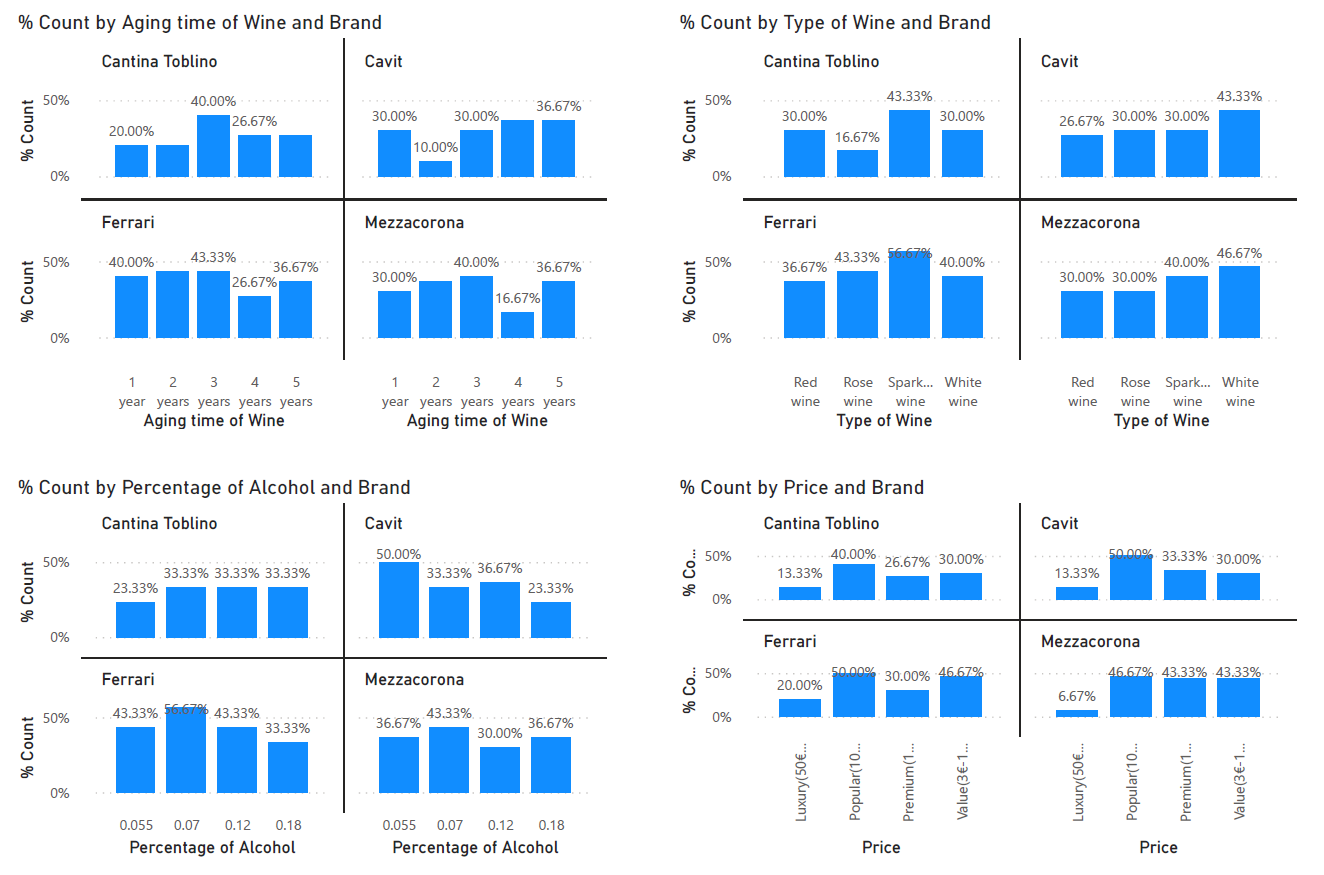

Picking the row numbers for the combinations of most chosen attributes.

In [ ]:
# Finding the row numbers for optimum combinations for the competitors.

dd[dd$Brand == "Ferrari" & 
  dd$Price == "Popular(10€-15€)"	& 
  dd$Type.of.Wine == "Sparkling wine" & 
  dd$Percentage.of.Alcohol == "7 %" &
  dd$Aging.time.of.Wine == "2 years" 
  ,]

dd[dd$Brand == "Ferrari" & 
  dd$Price == "Popular(10€-15€)"	& 
  dd$Type.of.Wine == "Sparkling wine" & 
  dd$Percentage.of.Alcohol == "7 %" &
  dd$Aging.time.of.Wine == "3 years" 
  ,]

dd[dd$Brand == "Cantina Toblino" & 
  dd$Price == "Popular(10€-15€)"	& 
  dd$Type.of.Wine == "Sparkling wine" & 
  dd$Percentage.of.Alcohol == "7 %" &
  dd$Aging.time.of.Wine == "3 years" 
  ,]

dd[dd$Brand == "Cantina Toblino" & 
  dd$Price == "Popular(10€-15€)"	& 
  dd$Type.of.Wine == "Sparkling wine" & 
  dd$Percentage.of.Alcohol == "12 %" &
  dd$Aging.time.of.Wine == "3 years" 
  ,]

dd[dd$Brand == "Cantina Toblino" & 
  dd$Price == "Popular(10€-15€)"	& 
  dd$Type.of.Wine == "Sparkling wine" & 
  dd$Percentage.of.Alcohol == "18 %" &
  dd$Aging.time.of.Wine == "3 years" 
  ,]

dd[dd$Brand == "Mezzacorona" & 
  dd$Price == "Popular(10€-15€)"	& 
  dd$Type.of.Wine == "White wine" & 
  dd$Percentage.of.Alcohol == "7 %" &
  dd$Aging.time.of.Wine == "3 years" 
  ,]

,Price,Brand,Type.of.Wine,Percentage.of.Alcohol,Aging.time.of.Wine
,<fct>,<fct>,<fct>,<fct>,<fct>
362,Popular(10€-15€),Ferrari,Sparkling wine,7 %,2 years


,Price,Brand,Type.of.Wine,Percentage.of.Alcohol,Aging.time.of.Wine
,<fct>,<fct>,<fct>,<fct>,<fct>
618,Popular(10€-15€),Ferrari,Sparkling wine,7 %,3 years


,Price,Brand,Type.of.Wine,Percentage.of.Alcohol,Aging.time.of.Wine
,<fct>,<fct>,<fct>,<fct>,<fct>
610,Popular(10€-15€),Cantina Toblino,Sparkling wine,7 %,3 years


,Price,Brand,Type.of.Wine,Percentage.of.Alcohol,Aging.time.of.Wine
,<fct>,<fct>,<fct>,<fct>,<fct>
674,Popular(10€-15€),Cantina Toblino,Sparkling wine,12 %,3 years


,Price,Brand,Type.of.Wine,Percentage.of.Alcohol,Aging.time.of.Wine
,<fct>,<fct>,<fct>,<fct>,<fct>
738,Popular(10€-15€),Cantina Toblino,Sparkling wine,18 %,3 years


,Price,Brand,Type.of.Wine,Percentage.of.Alcohol,Aging.time.of.Wine
,<fct>,<fct>,<fct>,<fct>,<fct>
638,Popular(10€-15€),Mezzacorona,White wine,7 %,3 years


In [ ]:
# handpicking base as well as competitors from the master dataframe manually:

(new.data <- dd[c(822, 610, 674, 738, 362, 618, 638), ]) # find attrib at top

,Price,Brand,Type.of.Wine,Percentage.of.Alcohol,Aging.time.of.Wine
,<fct>,<fct>,<fct>,<fct>,<fct>
822,Popular(10€-15€),Cavit,White wine,5.5 %,4 years
610,Popular(10€-15€),Cantina Toblino,Sparkling wine,7 %,3 years
674,Popular(10€-15€),Cantina Toblino,Sparkling wine,12 %,3 years
738,Popular(10€-15€),Cantina Toblino,Sparkling wine,18 %,3 years
362,Popular(10€-15€),Ferrari,Sparkling wine,7 %,2 years
618,Popular(10€-15€),Ferrari,Sparkling wine,7 %,3 years
638,Popular(10€-15€),Mezzacorona,White wine,7 %,3 years


In [ ]:
predict.mnl(m1, new.data)

,share,Price,Brand,Type.of.Wine,Percentage.of.Alcohol,Aging.time.of.Wine
,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>
822,0.08791050,Popular(10€-15€),Cavit,White wine,5.5 %,4 years
610,0.09992091,Popular(10€-15€),Cantina Toblino,Sparkling wine,7 %,3 years
674,0.11776021,Popular(10€-15€),Cantina Toblino,Sparkling wine,12 %,3 years
738,0.10901894,Popular(10€-15€),Cantina Toblino,Sparkling wine,18 %,3 years
362,0.14743278,Popular(10€-15€),Ferrari,Sparkling wine,7 %,2 years
618,0.23980020,Popular(10€-15€),Ferrari,Sparkling wine,7 %,3 years
638,0.19815646,Popular(10€-15€),Mezzacorona,White wine,7 %,3 years


## Sensitivity Plot:

For Share Simulation we used row 1 as baseline design and row 2,3,4,5,6 & 7 as competitor designs.  
Separating the two for sensitivity plot.

In [ ]:
base.data <- new.data[c(1), ]


competitor.data <- new.data[c(2,3,4,5,6,7), ]

In [ ]:
# Share sensitivity
sensitivity.mnl <- function(model, attrib, base.data, competitor.data) {
  # Function for creating data for a share-sensitivity chart
  # model: mlogit object returned by mlogit() function
  # attrib: list of vectors with attribute levels to be used in sensitivity
  # base.data: data frame containing baseline design of target product
  # competitor.data: data frame contining design of competitive set
  data <- rbind(base.data, competitor.data)
  base.share <- predict.mnl(model, data)[1, 1]
  share <- NULL
  for (a in seq_along(attrib)) {
    for (i in attrib[[a]]) {
      data[1,] <- base.data
      data[1,a] <- i
      share <- c(share, predict.mnl(model, data)[1, 1])
    }
  }
  data.frame(level=unlist(attrib), share=share, increase=share-base.share)
}

### Trade Off Table:

In [ ]:
# trade off table gives a clearer picture of how the share would get affected 
# when attribues are varied from the base design.

(tradeoff <- sensitivity.mnl(m1, attrib, base.data, competitor.data))

,level,share,increase
,<chr>,<dbl>,<dbl>
Price1,Value(3€-10€),0.02097490,-0.066935605
Price2,Popular(10€-15€),0.08791050,0.000000000
Price3,Premium(15€-30€),0.05684019,-0.031070312
Price4,Luxury(50€-100€),0.08170214,-0.006208358
Brand1,Cantina Toblino,0.06337662,-0.024533879
Brand2,Cavit,0.08791050,0.000000000
Brand3,Ferrari,0.13970298,0.051792480
Brand4,Mezzacorona,0.11616831,0.028257810
Type.of.Wine1,Red wine,0.07057659,-0.017333907


Explanation of the trade off table goes here ...  

x ---------  x  --------- x

### Barplot to show sensitivity to varying combinations:

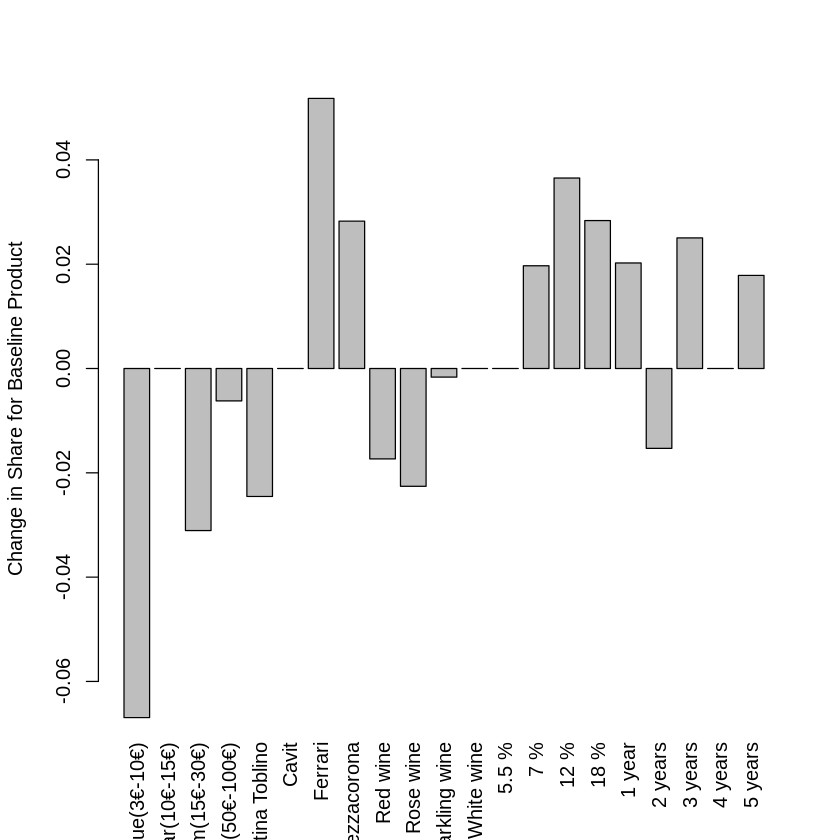

In [ ]:
# Sensitivity plot using the tradeoff table

barplot(tradeoff$increase, horiz=FALSE, names.arg=tradeoff$level,
        ylab="Change in Share for Baseline Product",las=3)

Explanation of Sensitivity plot goes here....  

# Fitting a choice model considering Customer Heterogenity:

Customer Herterogenity:  
Different people have different preferences.  Hence individual level coefficients can it the data better than sample level models and also with better accuracy in prediction as compared to sample level models.  


\\

In this segment we will cover 3 aspects.  
diversity of preference | customer targetting | Segmentation  





### Correlated Random Parameters Vs Independent Random Parameters:

We can either allow the random parameters to be correlated or independent.  

 If correlation = TRUE, the correlation between the random parameters are taken into account by estimating the components of the cholesky decomposition of the covariance matrix. 

With G random parameters, without correlation G standard deviations are estimated and with correlation G * (G + 1) /2 coefficients are estimated.


For this first run, we assume that the random parameters are not correlated `(correlation=FALSE)`

### Correlated parameters case

In [ ]:
m1.rpar <- rep("n", length=length(m1$coef))
names(m1.rpar) <- names(m1$coef)
m1.rpar

PricePopular(10€-15€)      PricePremium(15€-30€) 
                       "n"                        "n" 
        PriceValue(3€-10€)                 BrandCavit 
                       "n"                        "n" 
              BrandFerrari           BrandMezzacorona 
                       "n"                        "n" 
     Type.of.WineRose wine Type.of.WineSparkling wine 
                       "n"                        "n" 
    Type.of.WineWhite wine  Percentage.of.Alcohol18 % 
                       "n"                        "n" 
Percentage.of.Alcohol5.5 %   Percentage.of.Alcohol7 % 
                       "n"                        "n" 
 Aging.time.of.Wine2 years  Aging.time.of.Wine3 years 
                       "n"                        "n" 
 Aging.time.of.Wine4 years  Aging.time.of.Wine5 years 
                       "n"                        "n"

In [ ]:
m1.hier <- mlogit(Choice ~ 0 + Price	+ Brand	+ Type.of.Wine	+Percentage.of.Alcohol	+Aging.time.of.Wine, 
                  data = cbc.mlogit, 
                  panel=TRUE, rpar = m1.rpar, correlation = FALSE)
summary(m1.hier)


Call:
mlogit(formula = Choice ~ 0 + Price + Brand + Type.of.Wine + 
    Percentage.of.Alcohol + Aging.time.of.Wine, data = cbc.mlogit, 
    rpar = m1.rpar, correlation = FALSE, panel = TRUE)

Frequencies of alternatives:choice
      1       2       3       4 
0.20476 0.26667 0.22381 0.30476 

bfgs method
34 iterations, 0h:0m:3s 
g'(-H)^-1g = 4.87E-07 
gradient close to zero 

Coefficients :
                               Estimate Std. Error z-value  Pr(>|z|)    
PricePopular(10€-15€)          2.066206   0.507813  4.0688 4.725e-05 ***
PricePremium(15€-30€)          1.383331   0.474098  2.9178 0.0035250 ** 
PriceValue(3€-10€)             1.598766   0.533355  2.9976 0.0027215 ** 
BrandCavit                     0.565028   0.423147  1.3353 0.1817780    
BrandFerrari                   1.422795   0.435506  3.2670 0.0010870 ** 
BrandMezzacorona               0.925398   0.429523  2.1545 0.0312026 *  
Type.of.WineRose wine          0.027485   0.434740  0.0632 0.9495898    
Type.of.WineSparkling

In [ ]:
stdev(m1.hier)

PricePopular(10€-15€)      PricePremium(15€-30€) 
                1.82201158                 1.28673985 
        PriceValue(3€-10€)                 BrandCavit 
                1.62544237                 0.27473064 
              BrandFerrari           BrandMezzacorona 
                1.17536178                 0.76089336 
     Type.of.WineRose wine Type.of.WineSparkling wine 
                0.56878696                 1.49718684 
    Type.of.WineWhite wine  Percentage.of.Alcohol18 % 
                0.02332135                 1.47519880 
Percentage.of.Alcohol5.5 %   Percentage.of.Alcohol7 % 
                1.83869136                 1.35425177 
 Aging.time.of.Wine2 years  Aging.time.of.Wine3 years 
                0.50444522                 0.37699850 
 Aging.time.of.Wine4 years  Aging.time.of.Wine5 years 
                0.26947498                 0.25716251

### Independent parameters case:

With correlation TRUE we are facing error.

In [ ]:
# m2.hier <- update(m1.hier, correlation = TRUE)
# summary(m2.hier)

# With this we get an error as:


```
Error in solve.default(-object$hessian[selcoef, selcoef]): system is computationally singular: reciprocal condition number = 1.76749e-20
Traceback:

1. summary(m2.hier)
2. summary.mlogit(m2.hier)
3. diag(vcov(object))
4. vcov(object)
5. vcov.mlogit(object)
6. solve(-object$hessian[selcoef, selcoef])
7. solve.default(-object$hessian[selcoef, selcoef])
```



**This error** means our design matrix is not invertible and therefore 
can't be used to develop a regression model. This results from linearly dependent columns, i.e. strongly correlated variables. Examine the pairwise covariance (or correlation) of our variables to investigate if there are any variables that can potentially be removed. We're looking for covariances (or correlations) >> 0. Alternatively, we can probably automate this variable selection by using a forward stepwise regression.

This can also result from having more variables than observations, in which case our design matrix is probably not full rank. This is a bit trickier to fix, but there are ways. I believe lasso regression is supposed to work well when the data is "wider" than it is "long."

One way to fix this error is by manually removing highly correlated (or identical) variables. To find highly correlated variable we run Chi Square tests.

In [ ]:
# in order to find correlaton we need to build the contingency table or frequency count table 
table(cbc.mlogit$Brand, cbc.mlogit$Type.of.Wine) 

                 
                  Red wine Rose wine Sparkling wine White wine
  Cantina Toblino       62        50             70         49
  Cavit                 43        44             52         64
  Ferrari               48        59             59         47
  Mezzacorona           46        41             53         53

In [ ]:
# Applying chi-square test to check correlation among two nominal columns.

# H0: The two variables are independent.
# H1: The two variables relate to each other.

# We set `correct=FALSE` to turn off Yates’ continuity correction.

chisq.test(cbc.mlogit$Brand, cbc.mlogit$Type.of.Wine,correct=FALSE) 


	Pearson's Chi-squared test

data:  cbc.mlogit$Brand and cbc.mlogit$Type.of.Wine
X-squared = 10.992, df = 9, p-value = 0.2763


The test statistic (X-squared) value of 10.992 tells us the difference between the observed data and the expected data, assuming the null hypothesis is true. The larger the value of X-squared, the greater the difference between the observed and expected data, indicating that the null hypothesis is less likely to be true. However, the X-squared value itself does not tell us whether or not to reject the null hypothesis. It must be compared with a critical value from the chi-squared distribution to determine the significance level.


In this case, the p-value of 0.2763 is greater than 0.05, which suggests that there is weak evidence to suggest that the two categorical variables (cbc.mlogit\$Brand and cbc.mlogit\$Type.of.Wine) are not independent. In other words they are independent.

In [ ]:
chisq.test(cbc.mlogit$Brand, cbc.mlogit$Percentage.of.Alcohol,correct=FALSE)


	Pearson's Chi-squared test

data:  cbc.mlogit$Brand and cbc.mlogit$Percentage.of.Alcohol
X-squared = 17.273, df = 9, p-value = 0.04461


The column Brand and Percentage of Alcohol has dependece. (as p value is < 0.05)

In [ ]:
chisq.test(cbc.mlogit$Brand, cbc.mlogit$Aging.time.of.Wine,correct=FALSE)


	Pearson's Chi-squared test

data:  cbc.mlogit$Brand and cbc.mlogit$Aging.time.of.Wine
X-squared = 22.992, df = 12, p-value = 0.02779


There exists dependence.


However a lower p-value indicates stronger evidence against the null hypothesis and therefore stronger evidence of dependence between the two variables. Based on this, we can say that the two variables "Brand" and "Aging time of Wine" are more dependent, with a p-value of 0.02779, compared to "Brand" and "Percentage of Alcohol" which has a p-value of 0.04461.

In [ ]:
chisq.test(cbc.mlogit$Brand, cbc.mlogit$Type.of.Wine,correct=FALSE)


	Pearson's Chi-squared test

data:  cbc.mlogit$Brand and cbc.mlogit$Type.of.Wine
X-squared = 10.992, df = 9, p-value = 0.2763


In [ ]:
chisq.test(cbc.mlogit$Brand, cbc.mlogit$Price,correct=FALSE)


	Pearson's Chi-squared test

data:  cbc.mlogit$Brand and cbc.mlogit$Price
X-squared = 10.266, df = 9, p-value = 0.3294


We decide to drop the feature "Aging time of Wine"

In [ ]:
# So brand, age and percentage are highly correlated.

# We will try the model without Age now:

m2.hier <- mlogit(Choice ~ 0 + Price	+ Brand	+ Type.of.Wine + Percentage.of.Alcohol, 
                  data = cbc.mlogit, 
                  panel=TRUE, rpar = c("PricePopular(10€-15€)"= 'n',
"PricePremium(15€-30€)"=  'n',
"PriceValue(3€-10€)"= 'n',
"BrandCavit"= 'n',
"BrandFerrari"= 'n',
"BrandMezzacorona"= 'n',
"Type.of.WineRose wine"= 'n',
"Type.of.WineSparkling wine"= 'n',
"Type.of.WineWhite wine"= 'n',
'Percentage.of.Alcohol18 %' = 'n',
'Percentage.of.Alcohol5.5 %' = 'n',
'Percentage.of.Alcohol7 %' = 'n'), correlation = TRUE)
summary(m2.hier)


Call:
mlogit(formula = Choice ~ 0 + Price + Brand + Type.of.Wine + 
    Percentage.of.Alcohol, data = cbc.mlogit, rpar = c(`PricePopular(10€-15€)` = "n", 
    `PricePremium(15€-30€)` = "n", `PriceValue(3€-10€)` = "n", 
    BrandCavit = "n", BrandFerrari = "n", BrandMezzacorona = "n", 
    `Type.of.WineRose wine` = "n", `Type.of.WineSparkling wine` = "n", 
    `Type.of.WineWhite wine` = "n", `Percentage.of.Alcohol18 %` = "n", 
    `Percentage.of.Alcohol5.5 %` = "n", `Percentage.of.Alcohol7 %` = "n"), 
    correlation = TRUE, panel = TRUE)

Frequencies of alternatives:choice
      1       2       3       4 
0.20476 0.26667 0.22381 0.30476 

bfgs method
220 iterations, 0h:0m:17s 
g'(-H)^-1g = 7.96E-07 
gradient close to zero 

Coefficients :
                                                            Estimate Std. Error
PricePopular(10€-15€)                                       32.54244  233.49927
PricePremium(15€-30€)                                       26.95174  183.20038
PriceValue

In [ ]:
# # So brand, age and percentage are highly correlated.

# # We will try the model without Age and Percentage now:

# m2.hier <- mlogit(Choice ~ 0 + Price	+ Brand	+ Type.of.Wine, 
#                   data = cbc.mlogit, 
#                   panel=TRUE, rpar = c("PricePopular(10€-15€)"= 'n',
# "PricePremium(15€-30€)"=  'n',
# "PriceValue(3€-10€)"= 'n',
# "BrandCavit"= 'n',
# "BrandFerrari"= 'n',
# "BrandMezzacorona"= 'n',
# "Type.of.WineRose wine"= 'n',
# "Type.of.WineSparkling wine"= 'n',
# "Type.of.WineWhite wine"= 'n'), correlation = TRUE)
# summary(m2.hier)

In [ ]:
# This matrix shows that the correlation between the part worth for every attribute level with each other:

cov2cor(cov.mlogit(m2.hier))

,PricePopular(10€-15€),PricePremium(15€-30€),PriceValue(3€-10€),BrandCavit,BrandFerrari,BrandMezzacorona,Type.of.WineRose wine,Type.of.WineSparkling wine,Type.of.WineWhite wine,Percentage.of.Alcohol18 %,Percentage.of.Alcohol5.5 %,Percentage.of.Alcohol7 %
PricePopular(10€-15€),1.00000000,0.99978114,0.66452450,-0.331234870,0.06671921,0.216709084,0.699795566,0.423660186,0.36219904,-0.104602754,0.492610287,0.10836515
PricePremium(15€-30€),0.99978114,1.00000000,0.65657024,-0.313799876,0.06169237,0.225203989,0.698474032,0.418293917,0.35811836,-0.107974664,0.493667803,0.10802858
PriceValue(3€-10€),0.66452450,0.65657024,1.00000000,-0.280582916,0.71280181,0.084611981,0.810081516,0.883885783,0.30640806,0.173756585,0.620761693,0.34222519
BrandCavit,-0.33123487,-0.31379988,-0.28058292,1.000000000,0.07455318,0.236176223,0.002067646,0.001722058,-0.22699721,-0.032676395,0.025441710,0.02350708
BrandFerrari,0.06671921,0.06169237,0.71280181,0.074553182,1.00000000,0.041047712,0.454818446,0.808977591,0.19759492,0.440937024,0.631766057,0.37881885
BrandMezzacorona,0.21670908,0.22520399,0.08461198,0.236176223,0.04104771,1.000000000,0.235182224,-0.003047671,0.02696285,-0.453198993,0.155849695,0.16323758
Type.of.WineRose wine,0.69979557,0.69847403,0.81008152,0.002067646,0.45481845,0.235182224,1.000000000,0.854280656,0.48527920,-0.135352158,0.589032460,0.06500860
Type.of.WineSparkling wine,0.42366019,0.41829392,0.88388578,0.001722058,0.80897759,-0.003047671,0.854280656,1.000000000,0.36269667,0.185774432,0.670393267,0.22149302
Type.of.WineWhite wine,0.36219904,0.35811836,0.30640806,-0.226997206,0.19759492,0.026962854,0.485279201,0.362696666,1.00000000,0.242359025,0.329574460,-0.22489528
Percentage.of.Alcohol18 %,-0.10460275,-0.10797466,0.17375658,-0.032676395,0.44093702,-0.453198993,-0.135352158,0.185774432,0.24235903,1.000000000,-0.007724804,0.15210711


This matrix is calculated because it helps understand the relationship between the different levels of each attribute. The correlation coefficients in the matrix give an indication of the degree of association between the part worths of two attribute levels. This can help determine whether there is any multicollinearity in the data, which can affect the stability and accuracy of the model's parameter estimates. Additionally, the correlation matrix can provide insights into the relative importance of the attributes in explaining the dependent variable.


Part worth for Price Popular(10€-15€) has very high correlation (0.98) with part worth for Price Premium(15€-30€). A strong association. In real data, it is common to find
correlations between levels of the same attribute; if an attribute is important to a
respondent, then he or she will likely have parameters with larger absolute values
for all the levels of that attribute.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



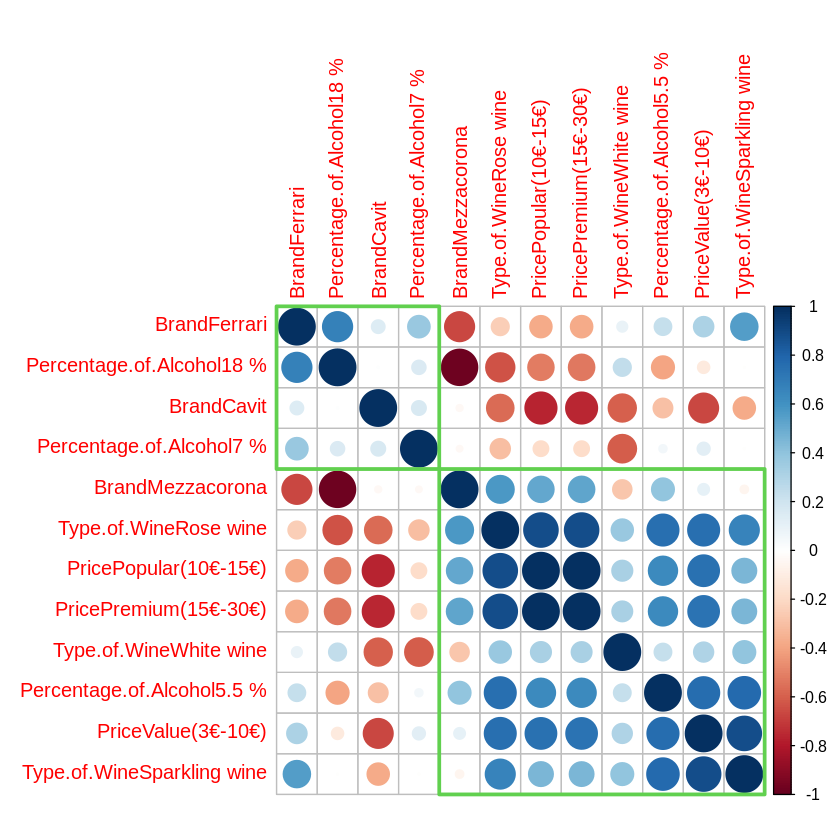

In [ ]:
# Plotting the same matrix in a correlation plot.

install.packages("corrplot")
library(corrplot)
corrplot(cor(cov.mlogit(m2.hier)),
         method = "circle",       
         order = "hclust",         # Ordering method of the matrix
         hclust.method = "ward.D", # If order = "hclust", is the cluster method to be used
         addrect = 2,              # If order = "hclust", number of cluster rectangles
         rect.col = 3,             # Color of the rectangles
         rect.lwd = 3)             # Line width of the rectangles

### Share Simulator :

In [ ]:

# Simulating shares
predict.hier.mnl <- function(model, data, nresp=1000) {
  # Function to predict shares from a hierarchical multinomial logit model 
  # model: mlogit object returned by mlogit()
  # data: a data frame containing the set of designs for which you want to 
  #       predict shares.  Same format at the data used to estimate model. 
  # Note that this code assumes all model parameters are random
  library(MASS)
  data.model <- model.matrix(update(model$formula, 0 ~ .), data = data)[ , -1]
  coef.Sigma <- cov.mlogit(model)
  coef.mu <- model$coef[1:dim(coef.Sigma)[1]]
  draws <- mvrnorm(n=nresp, coef.mu, coef.Sigma)
  shares <- matrix(NA, nrow=nresp, ncol=nrow(data))
  for (i in 1:nresp) {
    utility <- data.model%*%draws[i, ]
    share = exp(utility)/sum(exp(utility))
    shares[i, ] <- share
  }
  cbind(colMeans(shares), data)
}

In [ ]:
predict.hier.mnl(m2.hier, data=new.data)

,colMeans(shares),Price,Brand,Type.of.Wine,Percentage.of.Alcohol,Aging.time.of.Wine
,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>
822,0.22511020,Popular(10€-15€),Cavit,White wine,5.5 %,4 years
610,0.02773092,Popular(10€-15€),Cantina Toblino,Sparkling wine,7 %,3 years
674,0.22545170,Popular(10€-15€),Cantina Toblino,Sparkling wine,12 %,3 years
738,0.15106438,Popular(10€-15€),Cantina Toblino,Sparkling wine,18 %,3 years
362,0.10127301,Popular(10€-15€),Ferrari,Sparkling wine,7 %,2 years
618,0.10127301,Popular(10€-15€),Ferrari,Sparkling wine,7 %,3 years
638,0.16809678,Popular(10€-15€),Mezzacorona,White wine,7 %,3 years


In [ ]:
# Share sensitivity
sensitivity1.mnl <- function(model, attrib, base.data, competitor.data) {
  # Function for creating data for a share-sensitivity chart
  # model: mlogit object returned by mlogit() function
  # attrib: list of vectors with attribute levels to be used in sensitivity
  # base.data: data frame containing baseline design of target product
  # competitor.data: data frame contining design of competitive set
  data <- rbind(base.data, competitor.data)
  base.share <- predict.hier.mnl(model, data)[1, 1]
  share <- NULL
  for (a in seq_along(attrib)) {
    for (i in attrib[[a]]) {
      data[1,] <- base.data
      data[1,a] <- i
      share <- c(share, predict.hier.mnl(model, data)[1, 1])
    }
  }
  data.frame(level=unlist(attrib), share=share, increase=share-base.share)
}

In [ ]:
tradeoff <- sensitivity1.mnl(m2.hier, attrib, base.data, competitor.data)

In [ ]:
tradeoff

,level,share,increase
,<chr>,<dbl>,<dbl>
Price1,Value(3€-10€),0.1409499,-0.06179818
Price2,Popular(10€-15€),0.2313434,0.02859531
Price3,Premium(15€-30€),0.1851513,-0.01759674
Price4,Luxury(50€-100€),0.1919294,-0.01081869
Brand1,Cantina Toblino,0.2166581,0.01391005
Brand2,Cavit,0.2422183,0.03947019
Brand3,Ferrari,0.1880909,-0.01465716
Brand4,Mezzacorona,0.2331560,0.03040796
Type.of.Wine1,Red wine,0.1763217,-0.02642635


### Sensitivity Plot:

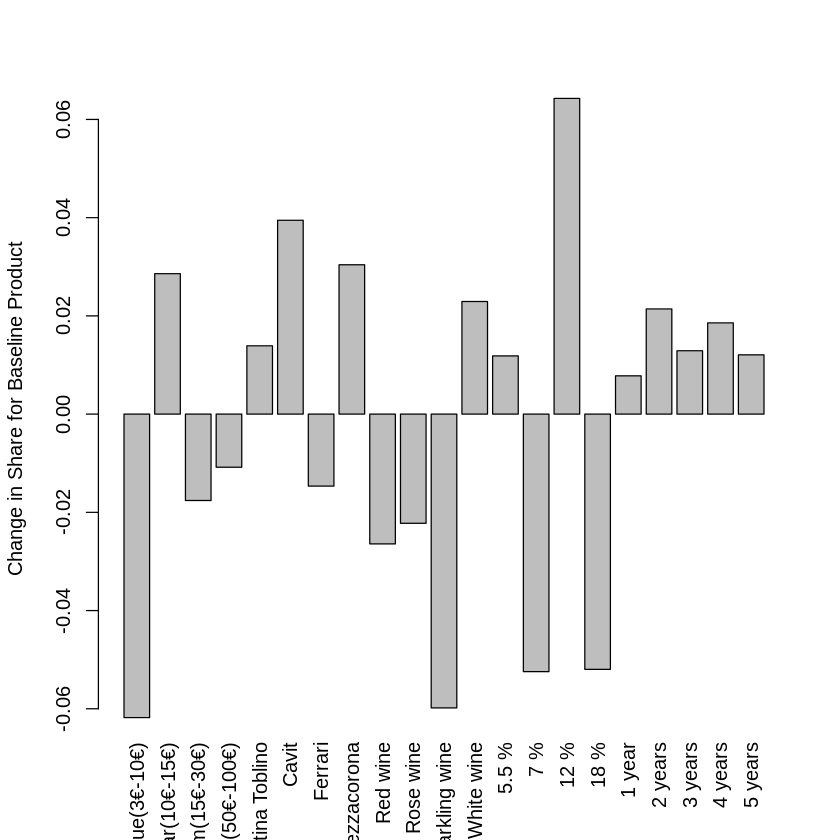

In [ ]:
# Sensitivity plot using the tradeoff table

barplot(tradeoff$increase, names.arg=tradeoff$level,
        ylab="Change in Share for Baseline Product",las=3)

# Extra: